# Parsing Apartments

In this prosit the aim is to cluster real estate apartments based on their similarity in order to boost customer purchases for a real estate agency in such a way that reduces visits.

Here, the agency is looking to group the apartments into two groups in order to provide better offerings for customers.

## Data import

Here, I will import the housing dataset needed for the task at hand.

In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "housing.csv"
housing = pd.read_csv(file_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Cleaning and Exploration

Here, I would explore the general structure of the data as well as descibe the data with summary tools.

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.shape

(20640, 10)

From observation of the shape of the dataset, it has 20640 rows meaning that the column `total_bedrooms` has missing data.

Paying attention to the data data types as well, I can tell that the column `ocean_proximity` is of textual form is categorical.

Next, I would cater for the missing values in the `total_bedrooms` column by first analysing it.

In [5]:
null_rows = housing['total_bedrooms'].isnull().sum()
null_percentage = (null_rows / housing.shape[0]) * 100
print(f"{null_percentage}% of the rows in total_bedrooms are null")

1.002906976744186% of the rows in total_bedrooms are null


Due to the little percentage of the data in the `total_bedrooms` column that is null, I can go ahead and drop those rows but would impute those rows with the median value of the entire dataset in order to preserve the little amount of data that can be lost.

In [6]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [7]:
total_bedrooms = housing[['total_bedrooms']]
total_bedrooms

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [8]:
housing['total_bedrooms'] = imputer.fit_transform(total_bedrooms)
housing['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Now that the `total_bedrooms` column has been cleaned and is void of any missing values, i would now go ahead to explore my data and analyse the general distribution of the data.

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


My key observations made from the analysis of the descriptive statistics above include;

* Columns like total_rooms, total_bedrooms, population, median_income, and households have outliers of extremely large values which may affect classification. This is evident from comparing their max values with the values of their 75th percentile value.
* Columns such as total_rooms and population might be right skewed due to the large difference between their mean values and mdian values.
* There might be a correlation between median_income and the median_house_value due to social patterns and the similarity between the interqualite ranges of these values.
* Columns sch as median_house_value might be capped due to the large difference between the max value and the 75% and how specific the max value is.


Next, I would explore these assumptions using graphs and charts.

In [11]:
import matplotlib 
import matplotlib.pyplot as plt 

In [12]:
def plot_histograms(df, rows, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(70, 50))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        axes[i].hist(df[col], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(col, fontsize=80)

        axes[i].tick_params(axis='x', labelsize=40)  # X-axis tick labels font size
        axes[i].tick_params(axis='y', labelsize=40)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout and add space between rows
    plt.subplots_adjust(hspace=40)
    plt.tight_layout()
    plt.show()

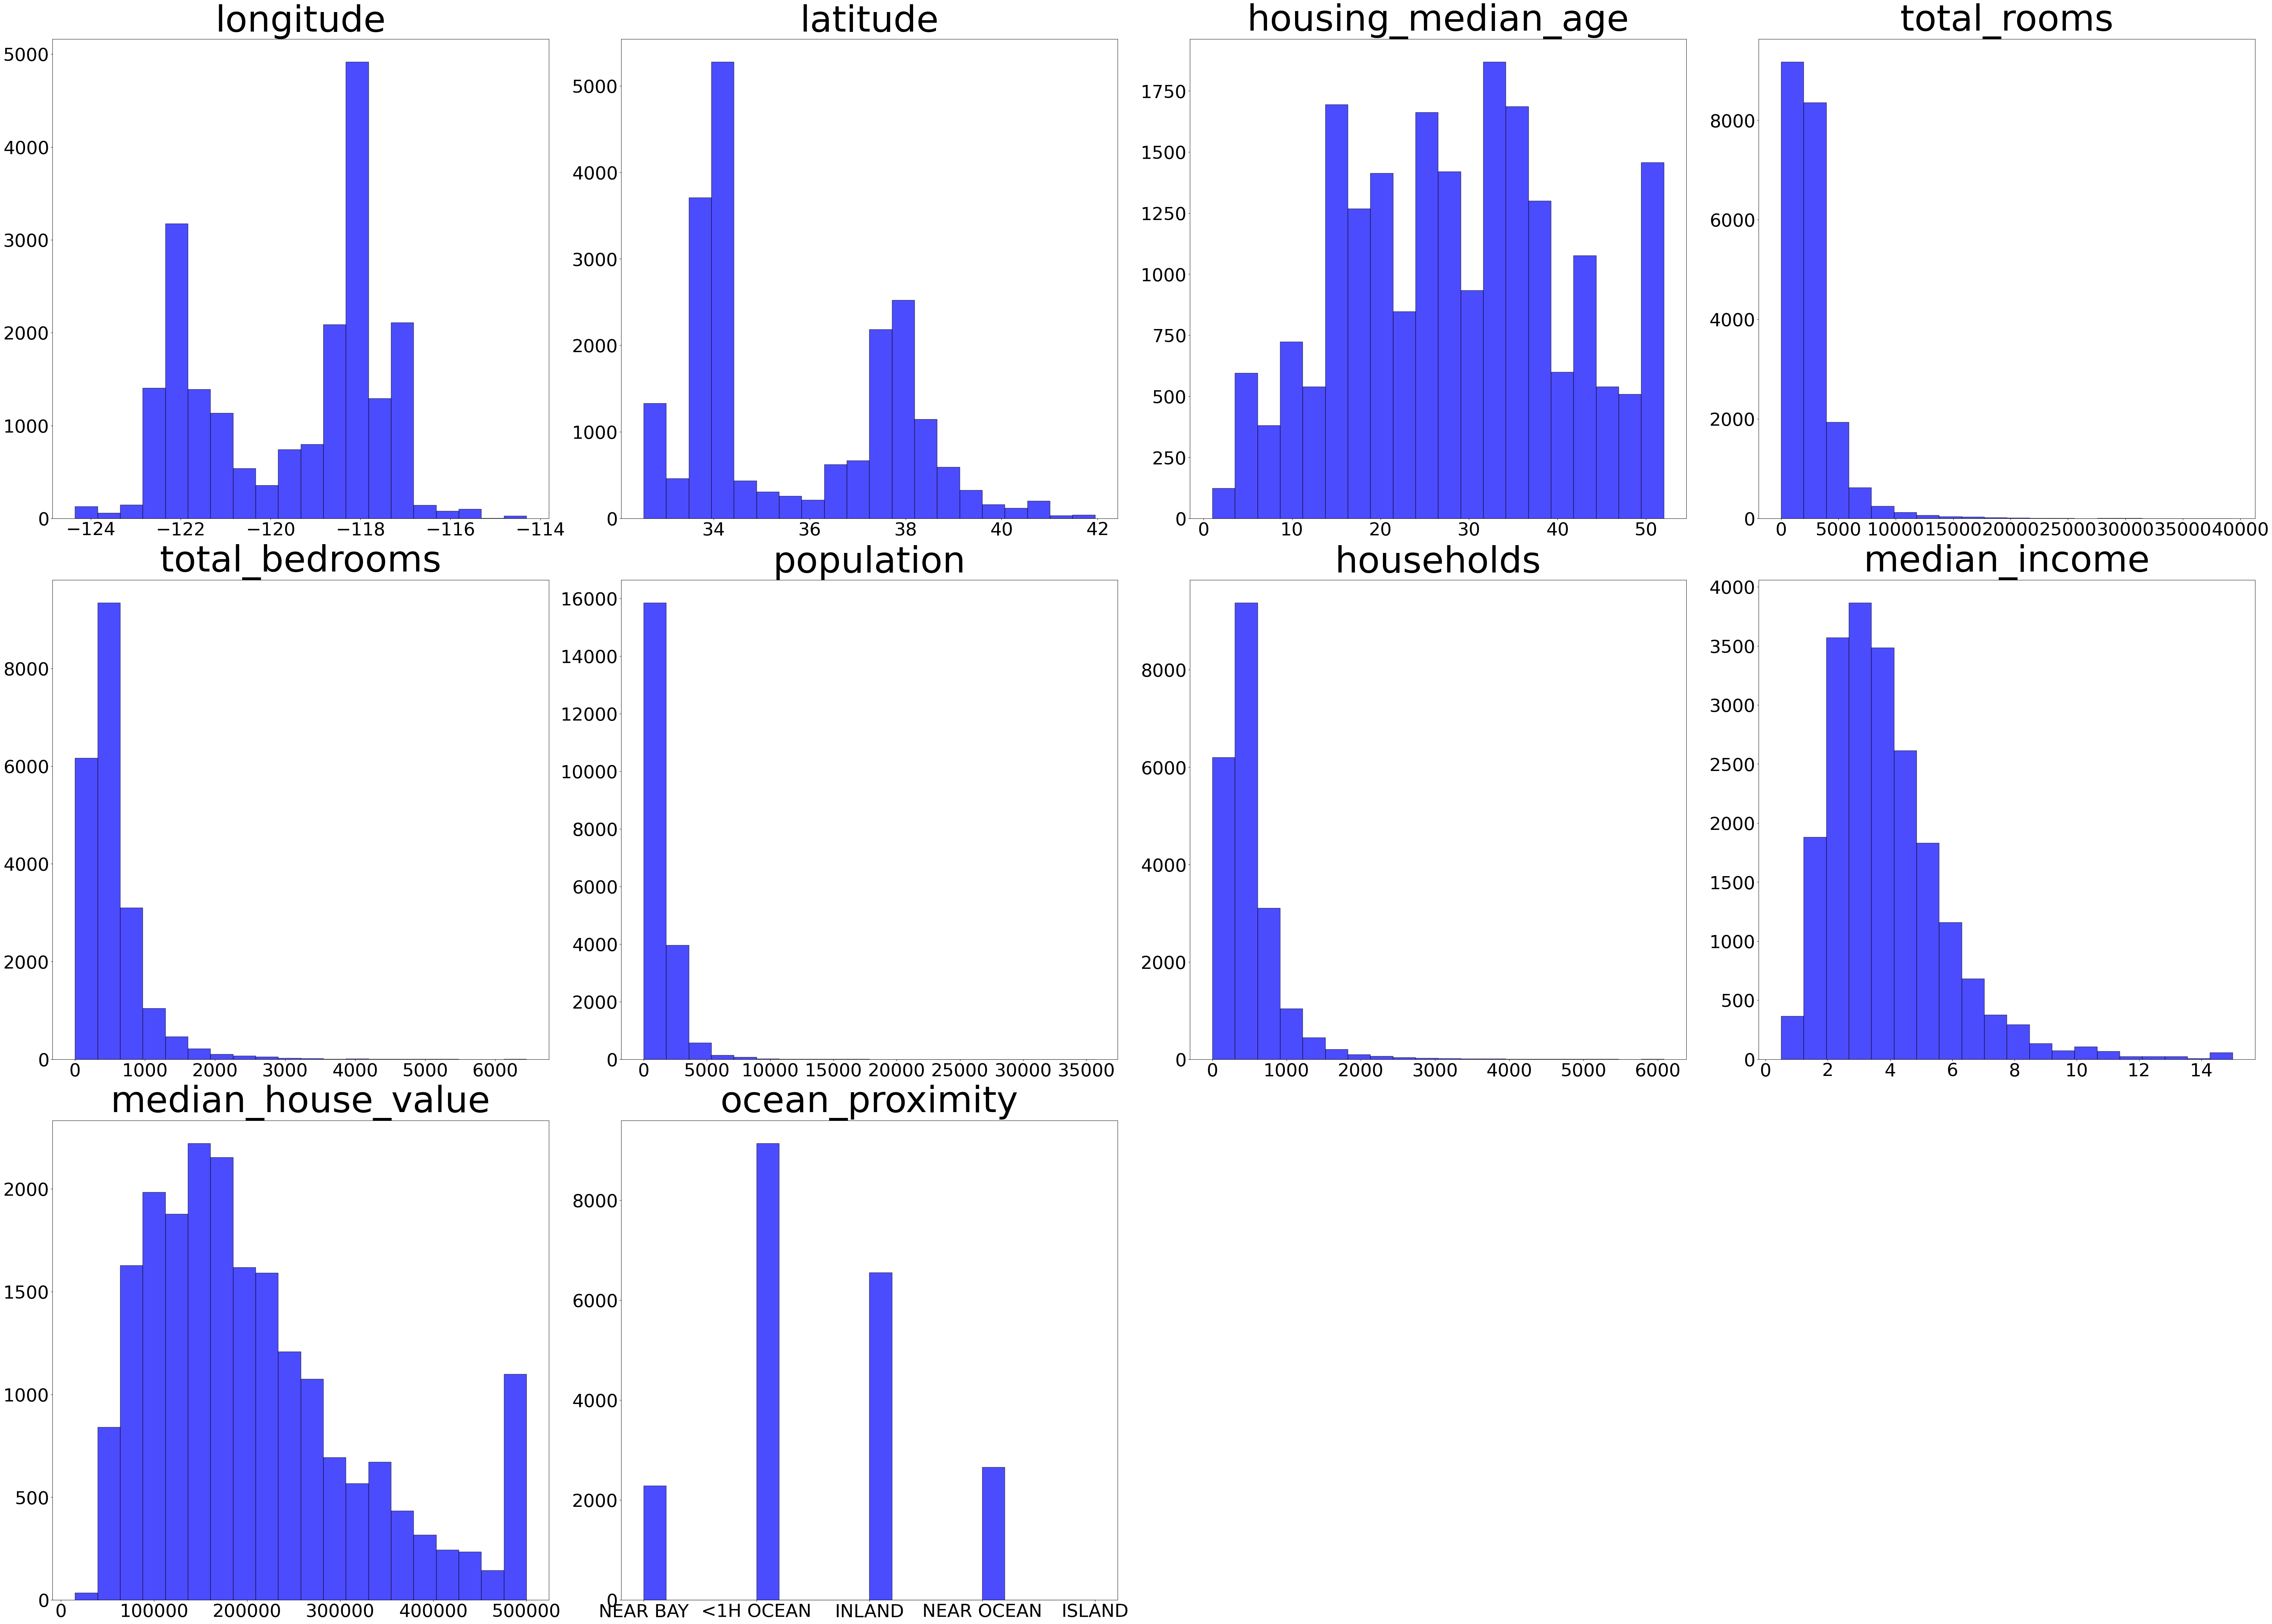

In [13]:
# Call the function to plot the histograms
plot_histograms(housing, 3)

From observing the histograms plotted on each column in the dataset I can gather more insights about my data.

* The outliers of the columns total_rooms, total_bedrooms, population, median_income, and households seem to be insignificant hence can be ignored in the data set.

* Several column values seem to be right-skewed hence one can assume there is a correlation between these variables.

* The relationship between median_income and median_house_value is valid due to the similarity in their data distribution from the histogram plotted.

* Median_house_value is truly capped at about 500000 due to the high frequency of house holds recorded with this value and the other findings I discussed initially about this feature. This might have a big effect on the classification results.

Next, I would further explore the outliers and the correlation between `median_income` and `median_house_value`.

The correlation between total_bedrooms, population, total_rooms, and households seem like a logical one that might not have to be explored.

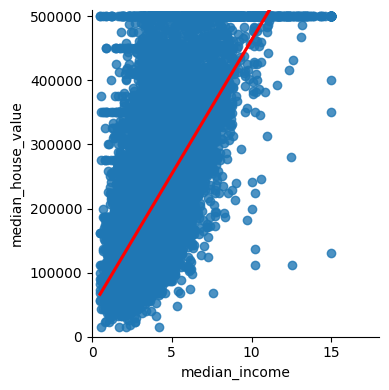

In [14]:
import seaborn as sns
sns.lmplot(x='median_income', y='median_house_value', 
           data=housing, 
           line_kws={'color': 'red'}, 
           height=4)

plt.xlim(0, 18)
plt.ylim(0, 510000)

# Show the plot
plt.show()

From the scatter plot above, it is evident that there is a positive correlation between the median_house_value and the median_income, which seems like a logical correlation according to social patterns.

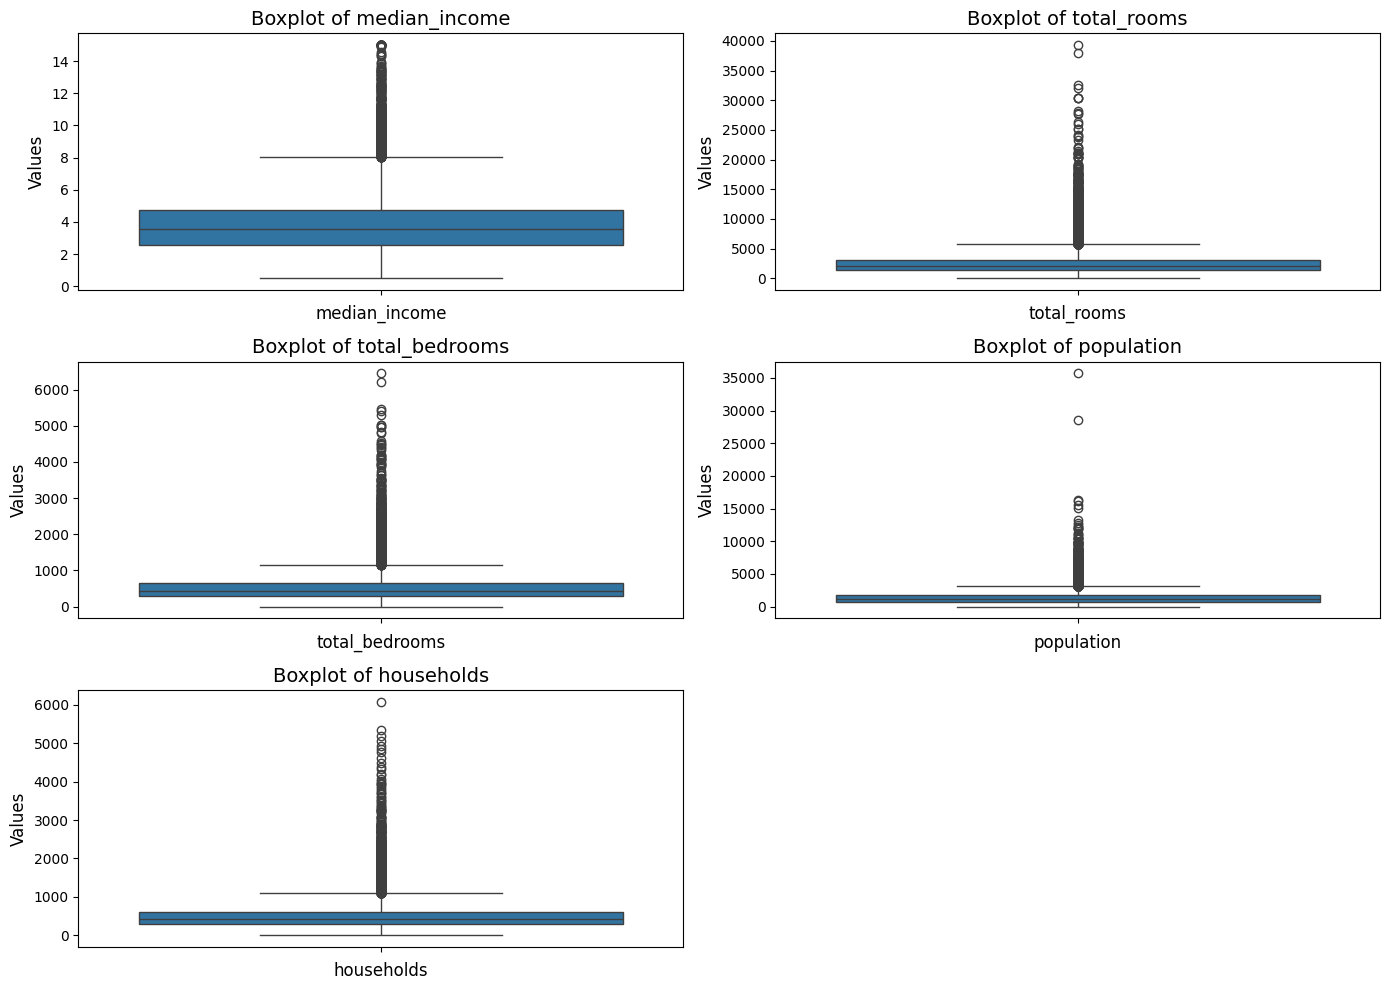

In [15]:
columns_to_plot = ['median_income','total_rooms', 'total_bedrooms', 'population', 'households']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=housing[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Values', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

From the boxplot diagrams above, I can tell that there are several outliers for each of the columns plotted. To determine if these outliers should be discarded from the dataset or not, I would check the number of outliers that occur for each of these columns by calculating the interquartile range and using this to find the upper bound and lower bound.

In [16]:
def count_outliers(columns_to_count):
    outlier_counts = {}

    for col in columns_to_count:
        Q1 = housing[col].quantile(0.25)
        Q3 = housing[col].quantile(0.75)
    
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = housing[(housing[col] < lower_bound) | (housing[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    print("Display the number of outliers for each column")
    print(outlier_counts)

    return outlier_counts

In [17]:
outlier_counts = count_outliers(columns_to_plot)

Display the number of outliers for each column
{'median_income': 681, 'total_rooms': 1287, 'total_bedrooms': 1306, 'population': 1196, 'households': 1220}


In [18]:
approx_num_of_instances = 0

for key, value in outlier_counts.items():
    approx_num_of_instances += value

print(f"The approximate total number of instances with values that classify as outliers is {approx_num_of_instances}")


The approximate total number of instances with values that classify as outliers is 5690


Based on the possible number of instances that might be lost if outliers are dropped it would be a better option to keep them in the dataset and scale them.

## Data Transformation

Here, I would create new columns that would provide more detail to the data to improve its structure for classification.

The extra fields I would add include;

* Rooms_per_household to provide insight on the size of a property.
* Bedrooms_per_room to provide insight about the kind of propery to distinguish between larger family homes and single/small apartments.
* Median_household_size to indicate the kind of properties in an area (family properties, etc.)
* Value_to_income_ration to provide insight as to the value of a house relative to the average income in an area to know whether hoseholds there are highpriced or not.

In [19]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['median_household_size'] = housing['population'] / housing['households']
housing['value_to_income_ratio'] = housing['median_house_value'] / housing['median_income']

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,median_household_size,value_to_income_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,54365.060299
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,43185.486785
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,48515.997465
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,60480.941327
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,88970.932349


In [21]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,median_household_size,value_to_income_ratio
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213794,3.070655,5.650519e+04
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.065248,10.386050,3.235592e+04
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308,3.576982e+03
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175225,2.429741,3.856380e+04
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203159,2.818116,4.950018e+04
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240126,3.282261,6.587920e+04
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333,1.000202e+06


In the newly added columns, it is evident that outliers have had a great effect on the data with majority of max values in these columns being extremely large. To further illustrate this, I would go ahead and plot these columns.

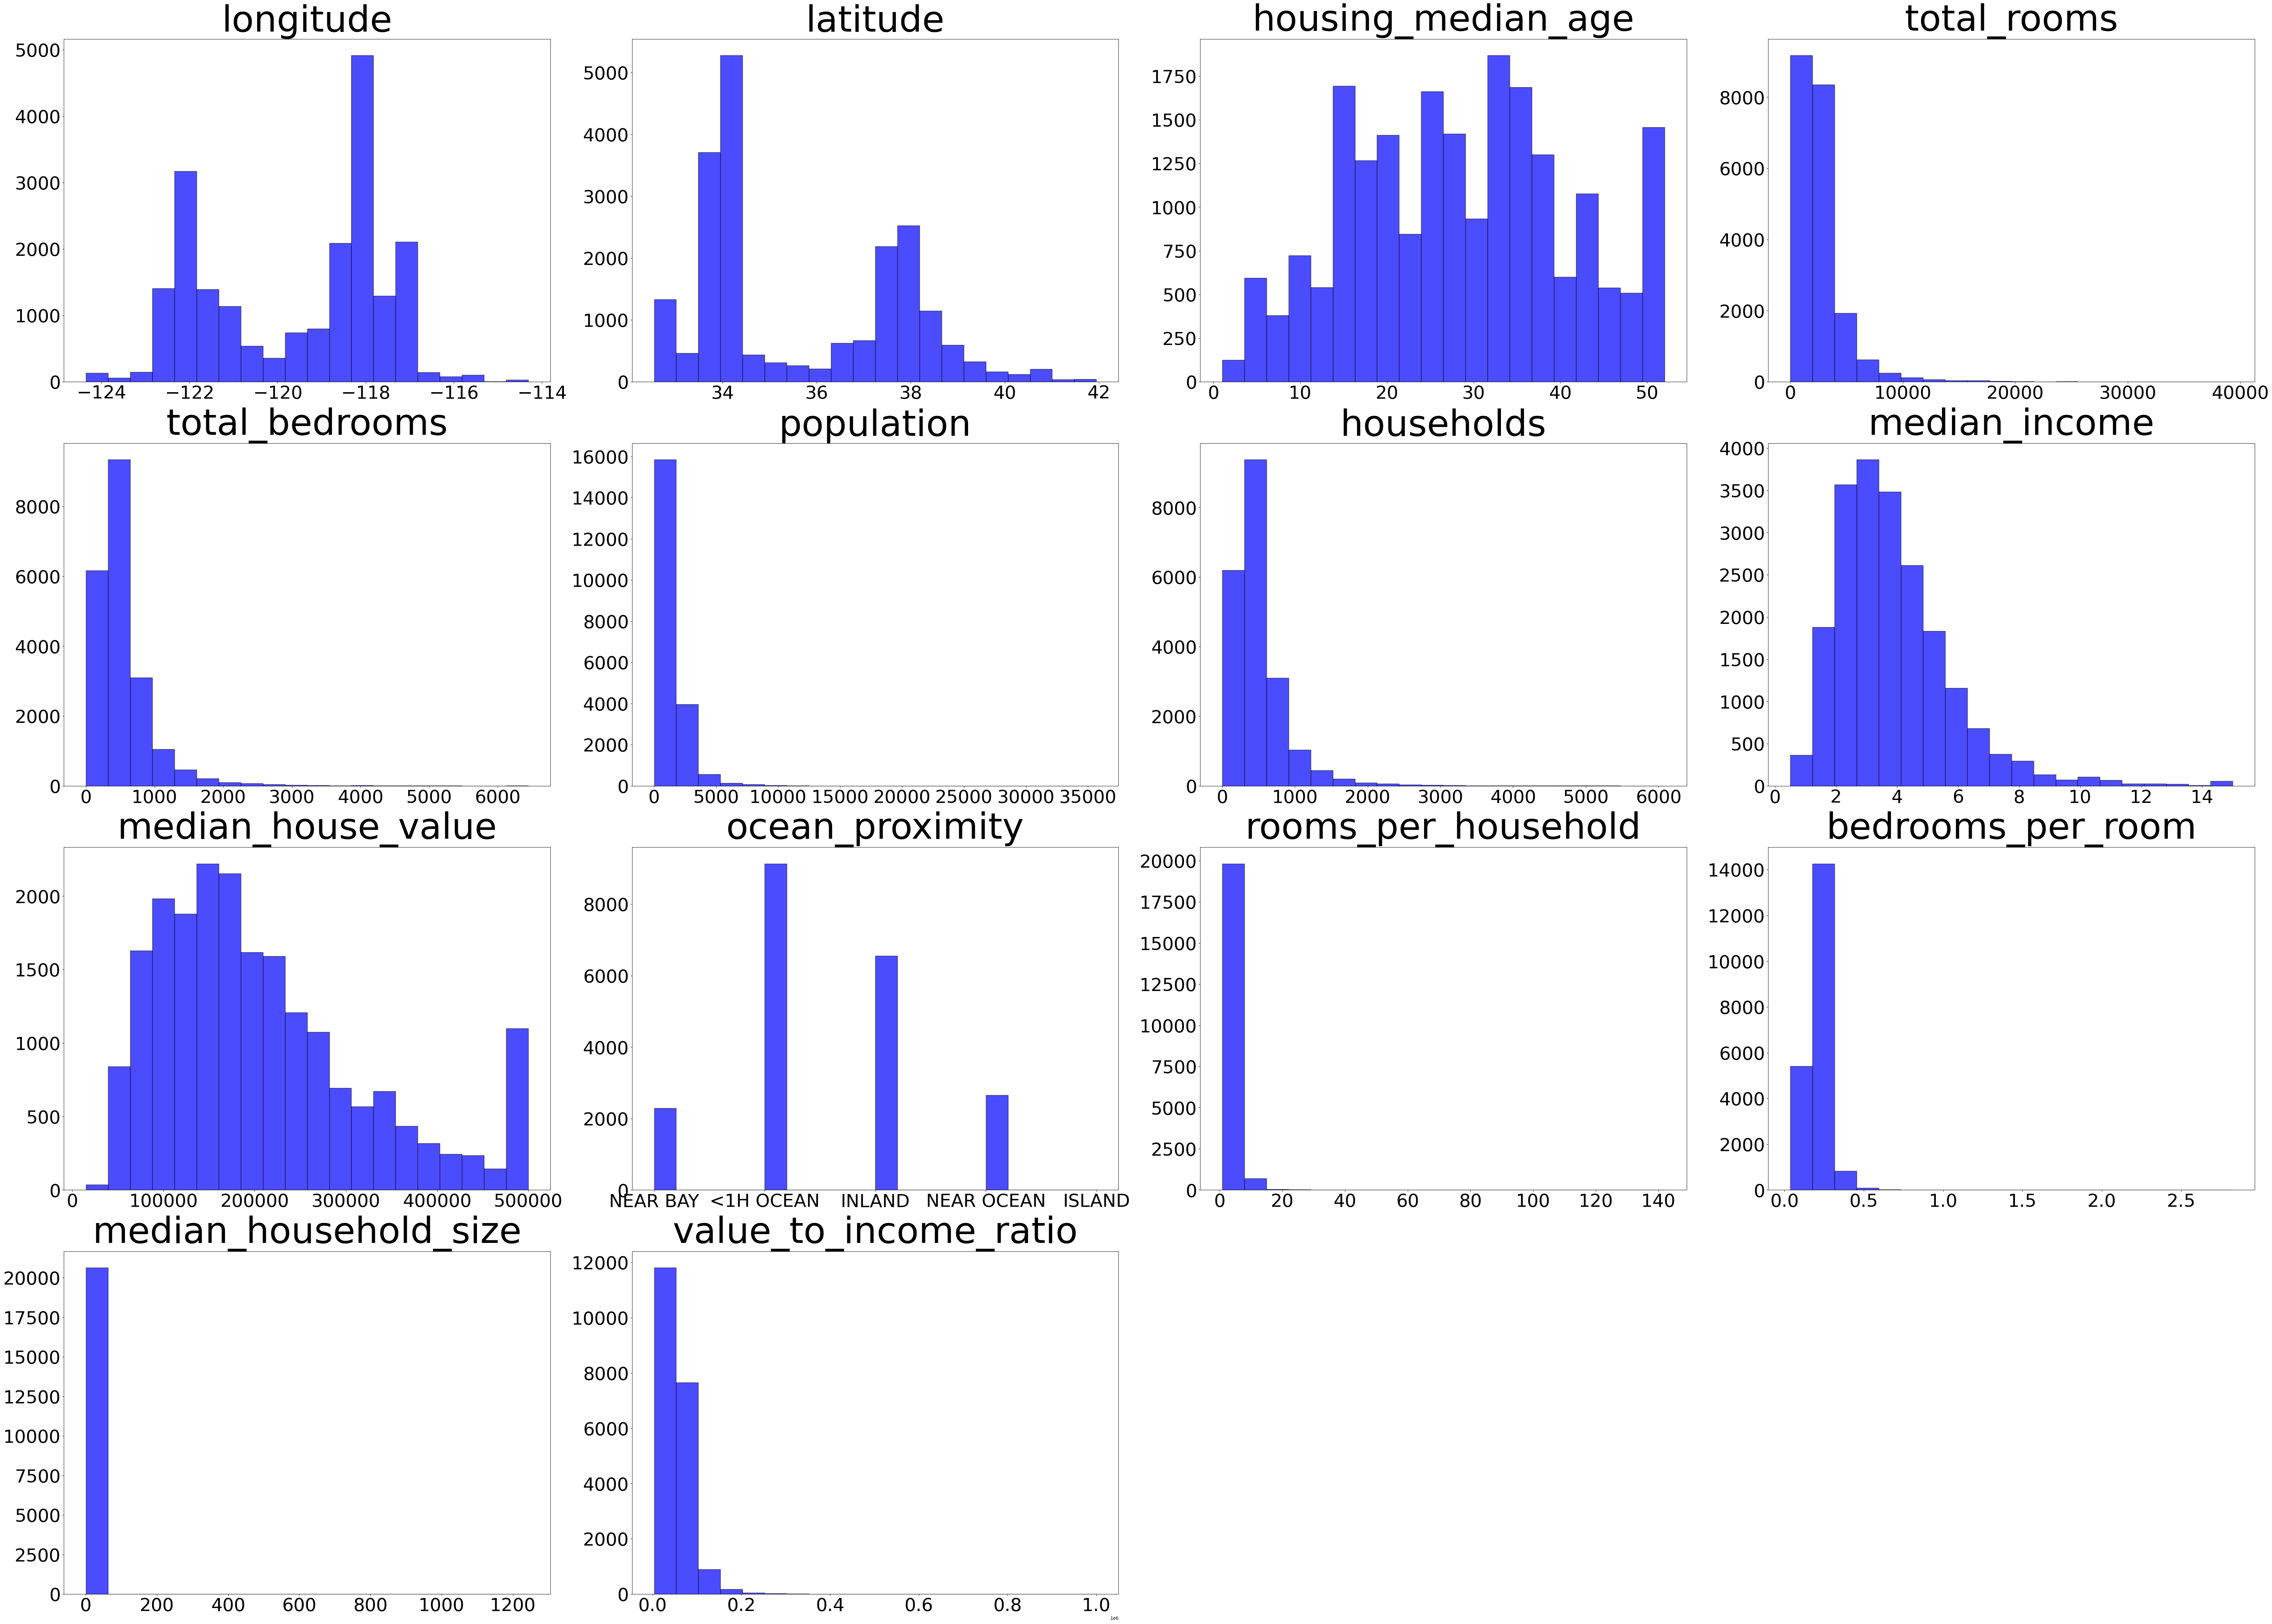

In [22]:
plot_histograms(housing, 4)

In [23]:
new_columns = ['rooms_per_household', 'bedrooms_per_room', 'median_household_size', 'value_to_income_ratio']

new_out_instances = count_outliers(new_columns)

Display the number of outliers for each column
{'rooms_per_household': 511, 'bedrooms_per_room': 635, 'median_household_size': 711, 'value_to_income_ratio': 1035}


In [24]:
approx_num_of_instances = 0

for key, value in new_out_instances.items():
    approx_num_of_instances += value

print(f"The approximate total number of new instances with values that classify as outliers is {approx_num_of_instances}")


The approximate total number of new instances with values that classify as outliers is 2892


In [25]:
percentage_of_new_outliers = approx_num_of_instances / housing.shape[0]
print(f"Percentage of new outlier instances is {percentage_of_new_outliers}")

Percentage of new outlier instances is 0.14011627906976745


Despite the low percentage of outlier instances that would be removed based on the new columns created removing these instances would affect the data, despite how neglible hence these outlier instances would not be removed.

Next, I would again, explore any correlations between the columns of the dataset with the addition of new columns.


In [64]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
filtered_corr_matrix = corr_matrix["median_house_value"] #corr_matrix[(corr_matrix > 0.3) | (corr_matrix < -0.3)]
filtered_corr_matrix

longitude               -0.045967
latitude                -0.144160
housing_median_age       0.105623
total_rooms              0.134153
total_bedrooms           0.049457
population              -0.024650
households               0.065843
median_income            0.688075
median_house_value       1.000000
rooms_per_household      0.151948
bedrooms_per_room       -0.233303
median_household_size   -0.023737
value_to_income_ratio    0.442203
Name: median_house_value, dtype: float64

In [66]:
extra_filtered_corr_matrix = filtered_corr_matrix[(filtered_corr_matrix > 0.1) | (filtered_corr_matrix < -0.1)]
extra_filtered_corr_matrix

latitude                -0.144160
housing_median_age       0.105623
total_rooms              0.134153
median_income            0.688075
median_house_value       1.000000
rooms_per_household      0.151948
bedrooms_per_room       -0.233303
value_to_income_ratio    0.442203
Name: median_house_value, dtype: float64

Here, based on the correlation between some of the columns and the median_house_value, I would drop some columns from the dataset to keep only the features that matter.

In [70]:
selected_columns = extra_filtered_corr_matrix.index
new_housing = housing[selected_columns]
new_housing["longitude"] = housing["longitude"]
new_housing['ocean_proximity'] = housing['ocean_proximity']

C:\Users\palal\AppData\Local\Temp\ipykernel_44952\3991766135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_housing["longitude"] = housing["longitude"]
C:\Users\palal\AppData\Local\Temp\ipykernel_44952\3991766135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_housing['ocean_proximity'] = housing['ocean_proximity']


In [71]:
new_housing.head()

,latitude,housing_median_age,total_rooms,median_income,median_house_value,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude,ocean_proximity
0,37.88,41.0,880.0,8.3252,452600.0,6.984127,0.146591,54365.060299,-122.23,NEAR BAY
1,37.86,21.0,7099.0,8.3014,358500.0,6.238137,0.155797,43185.486785,-122.22,NEAR BAY
2,37.85,52.0,1467.0,7.2574,352100.0,8.288136,0.129516,48515.997465,-122.24,NEAR BAY
3,37.85,52.0,1274.0,5.6431,341300.0,5.817352,0.184458,60480.941327,-122.25,NEAR BAY
4,37.85,52.0,1627.0,3.8462,342200.0,6.281853,0.172096,88970.932349,-122.25,NEAR BAY


Next, I would scale the numerical columns in the dataset and encode the categorical columns in the dataset in order to prepare my data to be clustered using the K-means method.

**Scaling Numerical Values**

Here, I would use the standardscaler to scale the columns of my dataset.

In [72]:
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               20640 non-null  float64
 1   housing_median_age     20640 non-null  float64
 2   total_rooms            20640 non-null  float64
 3   median_income          20640 non-null  float64
 4   median_house_value     20640 non-null  float64
 5   rooms_per_household    20640 non-null  float64
 6   bedrooms_per_room      20640 non-null  float64
 7   value_to_income_ratio  20640 non-null  float64
 8   longitude              20640 non-null  float64
 9   ocean_proximity        20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
housing_labels = new_housing['median_house_value']
housing_input = new_housing.drop("median_house_value", axis=1, inplace=False)

In [74]:
housing_labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [75]:
housing_input

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude,ocean_proximity
0,37.88,41.0,880.0,8.3252,6.984127,0.146591,54365.060299,-122.23,NEAR BAY
1,37.86,21.0,7099.0,8.3014,6.238137,0.155797,43185.486785,-122.22,NEAR BAY
2,37.85,52.0,1467.0,7.2574,8.288136,0.129516,48515.997465,-122.24,NEAR BAY
3,37.85,52.0,1274.0,5.6431,5.817352,0.184458,60480.941327,-122.25,NEAR BAY
4,37.85,52.0,1627.0,3.8462,6.281853,0.172096,88970.932349,-122.25,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,39.48,25.0,1665.0,1.5603,5.045455,0.224625,50054.476703,-121.09,INLAND
20636,39.49,18.0,697.0,2.5568,6.114035,0.215208,30154.881101,-121.21,INLAND
20637,39.43,17.0,2254.0,1.7000,5.205543,0.215173,54294.117647,-121.22,INLAND
20638,39.43,18.0,1860.0,1.8672,5.329513,0.219892,45362.039417,-121.32,INLAND


In [76]:
numerical_columns = housing_input.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['latitude', 'housing_median_age', 'total_rooms', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'value_to_income_ratio',
       'longitude'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
housing_scaled = housing_input[numerical_columns].copy()
housing_scaled[numerical_columns] = scaler.fit_transform(housing_input[numerical_columns])

In [78]:
housing_scaled.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude
0,1.052548,0.982143,-0.804819,2.344766,0.628559,-1.029988,-0.066145,-1.327835
1,1.043185,-0.607019,2.045890,2.332238,0.327041,-0.888897,-0.411672,-1.322844
2,1.038503,1.856182,-0.535746,1.782699,1.155620,-1.291686,-0.246922,-1.332827
3,1.038503,1.856182,-0.624215,0.932968,0.156966,-0.449613,0.122878,-1.337818
4,1.038503,1.856182,-0.462404,-0.012881,0.344711,-0.639087,1.003418,-1.337818


In [79]:
new_housing_data = housing_scaled.copy()
new_housing_data['ocean_proximity'] = new_housing['ocean_proximity']
new_housing_data

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude,ocean_proximity
0,1.052548,0.982143,-0.804819,2.344766,0.628559,-1.029988,-0.066145,-1.327835,NEAR BAY
1,1.043185,-0.607019,2.045890,2.332238,0.327041,-0.888897,-0.411672,-1.322844,NEAR BAY
2,1.038503,1.856182,-0.535746,1.782699,1.155620,-1.291686,-0.246922,-1.332827,NEAR BAY
3,1.038503,1.856182,-0.624215,0.932968,0.156966,-0.449613,0.122878,-1.337818,NEAR BAY
4,1.038503,1.856182,-0.462404,-0.012881,0.344711,-0.639087,1.003418,-1.337818,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,1.801647,-0.289187,-0.444985,-1.216128,-0.155023,0.165994,-0.199372,-0.758826,INLAND
20636,1.806329,-0.845393,-0.888704,-0.691593,0.276881,0.021671,-0.814409,-0.818722,INLAND
20637,1.778237,-0.924851,-0.174995,-1.142593,-0.090318,0.021134,-0.068338,-0.823713,INLAND
20638,1.778237,-0.845393,-0.355600,-1.054583,-0.040211,0.093467,-0.344401,-0.873626,INLAND


**Encoding Categorical Values**

Here, I woudld use the onehotencoder to ensure that the distance between the encoded numbers of the point are not necessary.

In [80]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
ocean_proximity_encoded = encoder.fit_transform(new_housing_data[['ocean_proximity']])
encoded_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))
housing_data_encoded = new_housing_data.join(encoded_df).drop('ocean_proximity', axis=1)
housing_data_encoded

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.052548,0.982143,-0.804819,2.344766,0.628559,-1.029988,-0.066145,-1.327835,0.0,0.0,0.0,1.0,0.0
1,1.043185,-0.607019,2.045890,2.332238,0.327041,-0.888897,-0.411672,-1.322844,0.0,0.0,0.0,1.0,0.0
2,1.038503,1.856182,-0.535746,1.782699,1.155620,-1.291686,-0.246922,-1.332827,0.0,0.0,0.0,1.0,0.0
3,1.038503,1.856182,-0.624215,0.932968,0.156966,-0.449613,0.122878,-1.337818,0.0,0.0,0.0,1.0,0.0
4,1.038503,1.856182,-0.462404,-0.012881,0.344711,-0.639087,1.003418,-1.337818,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.801647,-0.289187,-0.444985,-1.216128,-0.155023,0.165994,-0.199372,-0.758826,0.0,1.0,0.0,0.0,0.0
20636,1.806329,-0.845393,-0.888704,-0.691593,0.276881,0.021671,-0.814409,-0.818722,0.0,1.0,0.0,0.0,0.0
20637,1.778237,-0.924851,-0.174995,-1.142593,-0.090318,0.021134,-0.068338,-0.823713,0.0,1.0,0.0,0.0,0.0
20638,1.778237,-0.845393,-0.355600,-1.054583,-0.040211,0.093467,-0.344401,-0.873626,0.0,1.0,0.0,0.0,0.0


## Split Data into Training, Validation, and Testing sets.

Here I would split the data into 70% training, 20% validation, and 10% testing and proceed accordingly

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
#CODE TO BE COMPLETED
X_data = housing_data_encoded
Y_data = housing_labels

X_train, X_other, Y_train, Y_other = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [83]:
X_train.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,value_to_income_ratio,longitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7061,-0.796789,0.505394,-0.108071,0.137137,0.183239,-0.735069,-0.296518,0.773505,1.0,0.0,0.0,0.0,0.0
14689,-1.330521,-0.686477,-0.207541,-0.530363,-0.415418,0.472414,0.085496,1.237697,0.0,0.0,0.0,0.0,1.0
17323,-0.487786,-0.368645,-0.474322,0.174720,0.076207,-0.577106,0.164230,-0.284652,0.0,0.0,0.0,0.0,1.0
10056,1.698646,-1.163225,-0.836906,-0.400716,0.178070,-0.419552,-0.393591,-0.713904,0.0,1.0,0.0,0.0,0.0
15750,1.001048,1.856182,0.253138,-0.296809,-0.253745,0.127037,2.926852,-1.437644,0.0,0.0,0.0,1.0,0.0


In [84]:
X_train.shape

(14448, 13)

In [85]:
Y_train.shape

(14448,)

Now that I have secluded data from training, I would go on to split the rest of the data (the 30% remaining, into validation and testing)

In [86]:

X_val, X_test, Y_val, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state=42)

In [87]:
X_val.shape

(3096, 13)

In [88]:
Y_val.shape

(3096,)

## Model Building and Optimization

Here, I would build a linear model that makes use of the SGDRegressor and would go ahead to optimize it using hyperparameter tuning.

In [89]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss="squared_error", early_stopping=True)
sgd_reg

SGDRegressor(early_stopping=True)

In [90]:
from sklearn.metrics import mean_squared_error

sgd_reg.fit(X_train, Y_train)
sgd_test_predictions = sgd_reg.predict(X_train)

sgd_test_mse = mean_squared_error(Y_train, sgd_test_predictions)
sgd_test_rmse = np.sqrt(sgd_test_mse)

sgd_test_rmse

np.float64(46041.13979733637)

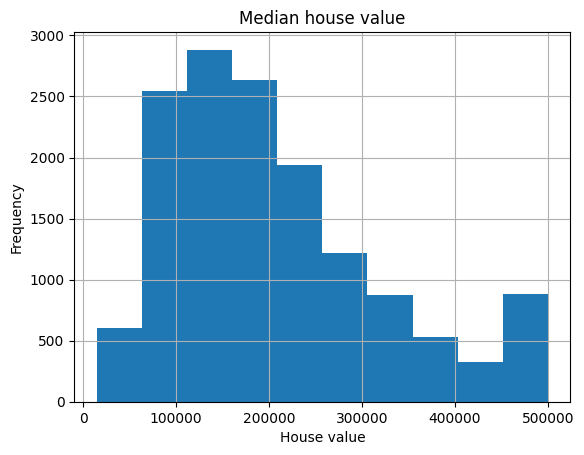

In [91]:
Y_train.hist()
plt.title("Median house value")
plt.xlabel("House value")
plt.ylabel("Frequency")
plt.show()

Based on the distribution of the median_house_values in the training data, the error root mean squared error of the SGDRegressor model can be reduced.

To improve this model, I would relax its paramters to see if it gets any better.

In [92]:
sgd_reg = SGDRegressor()
sgd_reg

SGDRegressor()

In [93]:
sgd_reg.fit(X_train, Y_train)
sgd_test_predictions = sgd_reg.predict(X_train)

sgd_test_mse = mean_squared_error(Y_train, sgd_test_predictions)
sgd_test_rmse = np.sqrt(sgd_test_mse)

sgd_test_rmse

np.float64(45980.73117558555)

By relaxing the parameters on this model, the root mean squared error has been reduced by a little amount. To confirm that this result is not as a result of overfitting, I would go ahead and validate the performance of the SGDRegreesor model.

**Cross Validation**

Here, I would use the inbuild cross-validation library that performs k-fold cross validation

In [94]:
from sklearn.model_selection import cross_val_score 

sgd_scores = cross_val_score(sgd_reg, X_train, Y_train, scoring="neg_mean_squared_error", cv=10) 
sgd_rmse_scores = np.sqrt(-sgd_scores)

In [95]:
def display_scores(scores): 
 print("Scores:", scores) 
 print("Mean:", scores.mean()) 
 print("Standard deviation:", scores.std()) 

display_scores(sgd_rmse_scores)

Scores: [42741.01400827 45111.8763411  56078.52703705 43041.04620861
 45632.94408795 50626.93655987 45269.81905069 44742.66421479
 46762.96160916 47048.89235655]
Mean: 46705.66814740406
Standard deviation: 3769.6393437733386


Here, based on the slight increase in the rmse value, I can say that the model does not overlearn the training data. To further improve this model, I would go ahead and fine tune the model to find suitable hyperparameters using the randomized search cross validation 

THe hyper paramters I would work with here include;

* alpha
* max_iter


In [104]:
from scipy.stats import uniform, randint 
from sklearn.model_selection import RandomizedSearchCV

param_distribs = { 
 'alpha': uniform(0.0001, 0.01), 
 'max_iter': randint(low=1000, high=2000), 
 } 

random_search = RandomizedSearchCV(sgd_reg, param_distribs, n_iter=10, cv=5, 
                    scoring='neg_mean_squared_error', return_train_score=True, random_state=42)

random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SGDRegressor(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FD63B5D820>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FD66748770>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [105]:
random_cv_res = random_search.cv_results_ 
random_cv_res['mean_test_score']

for mean_score, params in zip(random_cv_res['mean_test_score'], random_cv_res['params']):
    print(f"RMSE {np.sqrt(-mean_score)}, hyperparameters{params}")

RMSE 45964.19655088326, hyperparameters{'alpha': np.float64(0.0038454011884736248), 'max_iter': 1860}
RMSE 46315.87071349348, hyperparameters{'alpha': np.float64(0.001934347898661638), 'max_iter': 1071}
RMSE 46573.68768259764, hyperparameters{'alpha': np.float64(0.006086584841970367), 'max_iter': 1614}
RMSE 46173.13324481259, hyperparameters{'alpha': np.float64(0.004558327528535912), 'max_iter': 1214}
RMSE 47193.37990425983, hyperparameters{'alpha': np.float64(0.0006808361216819947), 'max_iter': 1087}
RMSE 46818.50972783544, hyperparameters{'alpha': np.float64(0.0034370861113902185), 'max_iter': 1871}
RMSE 45978.570602691005, hyperparameters{'alpha': np.float64(0.007180725777960455), 'max_iter': 1661}
RMSE 46906.56323891402, hyperparameters{'alpha': np.float64(0.0006641157902710027), 'max_iter': 1343}
RMSE 46532.79838303455, hyperparameters{'alpha': np.float64(0.008424426408004218), 'max_iter': 1805}
RMSE 47446.7872477346, hyperparameters{'alpha': np.float64(0.00010778765841014329), 'm

In [106]:
random_search.best_params_

{'alpha': np.float64(0.0038454011884736248), 'max_iter': 1860}

In [101]:
random_search.best_estimator_

SGDRegressor(alpha=np.float64(0.008424426408004218), max_iter=1805)

After acheiving a lower RMSE using the random search CV, I would go ahead and explore using a grid search CV to see if I can arrive at a more accurate model.

In [107]:
from sklearn.model_selection import GridSearchCV 

param_grid = [
 {'alpha': [0.0001, 0.001, 0.01, 0.005], 'max_iter': [1000, 2000, 1500, 1200]}
]

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, 
 scoring='neg_mean_squared_error', return_train_score=True) 
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.005],
                          'max_iter': [1000, 2000, 1500, 1200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
grid_cv_res = grid_search.cv_results_ 
grid_cv_res['mean_test_score']

for mean_score, params in zip(grid_cv_res['mean_test_score'], grid_cv_res['params']):
    print(f"RMSE {np.sqrt(-mean_score)}, hyperparameters{params}")

RMSE 46806.35333190857, hyperparameters{'alpha': 0.0001, 'max_iter': 1000}
RMSE 47654.402536576876, hyperparameters{'alpha': 0.0001, 'max_iter': 2000}
RMSE 47519.810724808194, hyperparameters{'alpha': 0.0001, 'max_iter': 1500}
RMSE 46531.689345203864, hyperparameters{'alpha': 0.0001, 'max_iter': 1200}
RMSE 46241.254918805615, hyperparameters{'alpha': 0.001, 'max_iter': 1000}
RMSE 46520.4626794671, hyperparameters{'alpha': 0.001, 'max_iter': 2000}
RMSE 46721.11006532831, hyperparameters{'alpha': 0.001, 'max_iter': 1500}
RMSE 46342.564243446024, hyperparameters{'alpha': 0.001, 'max_iter': 1200}
RMSE 46054.37093536917, hyperparameters{'alpha': 0.01, 'max_iter': 1000}
RMSE 46286.59578997917, hyperparameters{'alpha': 0.01, 'max_iter': 2000}
RMSE 46706.539715639396, hyperparameters{'alpha': 0.01, 'max_iter': 1500}
RMSE 46356.36822716677, hyperparameters{'alpha': 0.01, 'max_iter': 1200}
RMSE 47370.433700144706, hyperparameters{'alpha': 0.005, 'max_iter': 1000}
RMSE 47599.982586476, hyperparam

In [109]:
grid_search.best_params_

{'alpha': 0.01, 'max_iter': 1000}

The results of the Randomized CV seems to be better relative to the results of the grid search CV. For this reason, I would explore other hyperparameter ranges.

But first, I would explor using a different regression model i.e. The RandomForestRegression Model.

In [111]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train, Y_train)

forest_housing_predictions = forest_reg.predict(X_train) 
forest_mse = mean_squared_error(Y_train, forest_housing_predictions) 
forest_rmse = np.sqrt(forest_mse) 

forest_rmse

np.float64(1966.3414198186792)

Observing this, it is evident that the random forest model seems to be achieving more accurate results or is overlearning.

To confirm this, I would utilize k-fold cross validation

In [112]:
forest_scores = cross_val_score(forest_reg, X_train, Y_train, scoring="neg_mean_squared_error", cv=10) 
forest_rmse_scores = np.sqrt(-forest_scores) 
display_scores(forest_rmse_scores)

Scores: [5930.72206778 4225.02121587 5727.25824911 5560.47448029 5146.59098782
 6017.91812695 3448.46266803 6070.62324824 5515.17809071 4428.99819221]
Mean: 5207.124732702581
Standard deviation: 841.6332533224038


Here, with the increase in the RME calculated it is evident that there was some form of overlearning with this model.

Despite this, it still proves to be much more accurate than the suggested Stochastic Gradient Descent Regression Model.

Despite the fact that the Randome Forest Model would be more suitable for this problem, I would progress with the Stochastic Gradient Descent Regression Model because because it was suggested

In [114]:
first_model = random_search.best_estimator_
first_model

SGDRegressor(alpha=np.float64(0.0038454011884736248), max_iter=1860)

## Validation, Saving, and Testing of Final Model

Here, I would create a pipeline for my model creation, then I would proceed to validate the model. When this is done, I would save the model and then test the model on the testing set.